# King County Dataset Linear Regression Model 9

### Adjustments for this model:
    Start with getting rid of 'id', 'sqft_living15',	'sqft_lot15'
    Then deal with the NaN's in 'view', 'waterfront', 'yr_renovated', and 'sqft_basement'
    Change "?" in 'sqft_basement'
    Take care of outlier in bedrooms
    Deal with the date feature
    Bin: 'view', 'grade', 'condition', 'sqft_basement', 'yr_renovated'
    Log Transform 'sqft_lot' and 'data'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Change "?" in 'sqft_basement' to '0';
data.sqft_basement = data.sqft_basement.replace(to_replace = '?', value = '0')

In [6]:
# Account for missing data in 'waterfront', 'view', 'yr_renovated';
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)
data.view.fillna(value=data.view.median(), inplace = True)
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)
data.sqft_basement.fillna(value=data.sqft_basement.median(), inplace = True)


In [7]:
# Change outlier '33' to '3' in 'bedrooms';
data.at[15856,'bedrooms'] = 3

In [8]:
# Change 'date' feature to float;
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

In [27]:
data.date.describe()

count     21597.000000
mean     735535.180997
std         113.059987
min      735355.000000
25%      735436.000000
50%      735522.000000
75%      735646.000000
max      735745.000000
Name: date, dtype: float64

In [9]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [10]:
data.sqft_basement.describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [11]:
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,735535.180997,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,...,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,113.059987,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,...,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,735355.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,735436.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,735522.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,735646.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,735745.000000,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
# Create bins for 'yr_renovated' based on the values observed. 4 values will result in 3 bins
bins_A = [0, 1900,  2000, 2020]
bins_yr_renovated = pd.cut(data['yr_renovated'], bins_A)
#bins_yr_renovated = bins_yr_renovated.as_unordered()


yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr-ren", drop_first=True)
data = data.drop(["yr_renovated"], axis=1)
data = pd.concat([data, yr_renovated_dummy], axis=1)

In [17]:
# Create bins for 'sqft_basement' based on the values observed. 3 values will result in 2 bins
bins_B = [0, 100, 5000]
bins_sqft_basement = pd.cut(data['sqft_basement'], bins_B)

sqft_basement_dummy = pd.get_dummies(bins_sqft_basement, prefix="sqft_base", drop_first=True)
data = data.drop(["sqft_basement"], axis=1)
data = pd.concat([data, sqft_basement_dummy], axis=1)

In [18]:
# Create bins for 'view' based on the values observed. 3 values will result in 2 bins
bins_C = [0, 2, 4]
bins_view = pd.cut(data['view'], bins_C)

view_dummy = pd.get_dummies(bins_view, prefix="new_view", drop_first=True)
data = data.drop(["view"], axis=1)
data = pd.concat([data, view_dummy], axis=1)

In [19]:
# Create bins for 'grade' based on the values observed. 4 values will result in 3 bins
bins_D = [0, 5, 7, 13]
bins_grade = pd.cut(data['grade'], bins_D)

grade_dummy = pd.get_dummies(bins_grade, prefix="new_grade", drop_first=True)
data = data.drop(["grade"], axis=1)
data = pd.concat([data, grade_dummy], axis=1)

In [41]:
# Create bins for 'condition' based on the values observed. 3 values will result in 2 bins
bins_E = [1, 3, 5]
bins_condition = pd.cut(data['condition'], bins_E)

condition_dummy = pd.get_dummies(bins_condition, prefix="new_condition", drop_first=True)
data = data.drop(["condition"], axis=1)
data = pd.concat([data, condition_dummy], axis=1)

In [20]:
# Drop 'id' since it has no value;
# Drop "sqft_above", "sqft_lot15", "sqft_living15" due to multicolinearity;
X = data.drop(["id","sqft_above", "sqft_lot15", "sqft_living15", 'price'], axis=1)
y = pd.DataFrame(data, columns = ['price'])

In [21]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:47:02   Log-Likelihood:            -2.9559e+05
No. Observations:               21597   AIC:                         5.912e+05
Df Residuals:                   21579   BIC:                         5.914e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
date                     16.2538      3.947      4.118      0.000       8.517      23.991
bedrooms               -5.45e+04   2073.592    -26.285      0.000   -5.86e+04   -5.04e+04
bathrooms              5.003e+04   3479.111     14.381      0.000    4.32e+04    5.69e+04
sqft_living             265.3715      2.854     92.985      0.000     259.778     270.965
sqft_lot                 -0.0543      0.037     -1.477      0.140      -0.126       0.018
floors                 2.128e+04   3691.901      5.764      0.000     1.4e+04    2.85e+04
waterfront             6.312e+05   1.92e+04     32.795      0.000    5.94e+05    6.69e+05
condition              2.484e+04   2467.190     10.069      0.000       2e+04    2.97e+04
yr_built              -2219.0785     75.229    -29.498      0.000   -2366.532   -2071.625
zipcode                -734.2826     33.466    -21.941      0.000    -799.878    -668.687
lat                    6.714e+05   1.12e+04     59.787      0.000    6.49e+05    6.93e+05
long                  -2.653e+05   1.36e+04    -19.448      0.000   -2.92e+05   -2.39e+05
yr-ren_(1900, 2000]   -1.264e+04   1.12e+04     -1.132      0.258   -3.45e+04    9249.228
yr-ren_(2000, 2020]    1.083e+05   1.18e+04      9.156      0.000    8.51e+04    1.31e+05
sqft_base_(100, 5000] -3.309e+04   3546.495     -9.329      0.000      -4e+04   -2.61e+04
new_view_(2, 4]         2.06e+05   8507.926     24.215      0.000    1.89e+05    2.23e+05
new_grade_(5, 7]       6326.7416   1.34e+04      0.473      0.636   -1.99e+04    3.25e+04
new_grade_(7, 13]      6.611e+04   1.39e+04      4.748      0.000    3.88e+04    9.34e+04
==============================================================================
Omnibus:                    15811.517   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           943063.014
Skew:                           2.947   Prob(JB):                         0.00
Kurtosis:                      34.832   Cond. No.                     1.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [23]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [25]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 45474641646.15533
Test Mean Squarred Error: 44166960085.13396


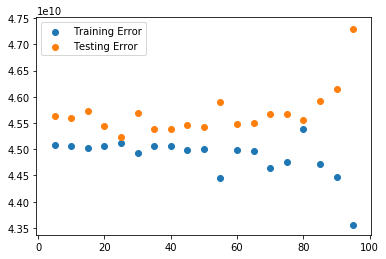

In [26]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-6.341391063228326e-20

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "price ~ date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+yr_renovated_dummy+view_dummy+sqft_basement_dummy+grade_dummy+waterfront+yr_built+zipcode+lat+long"

model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2508.
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:20:57   Log-Likelihood:            -2.9562e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21579   BIC:                         5.914e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.836e+07   9.91e+06     -6.897      0.000   -8.78e+07   -4.89e+07
date                    105.2153     12.845      8.191      0.000      80.038     130.393
bedrooms              -5.359e+04   2075.237    -25.824      0.000   -5.77e+04   -4.95e+04
bathrooms              5.288e+04   3474.855     15.217      0.000    4.61e+04    5.97e+04
sqft_living             265.7630      2.859     92.944      0.000     260.158     271.368
sqft_lot                 -0.0531      0.037     -1.444      0.149      -0.125       0.019
floors                 1.626e+04   3687.452      4.408      0.000    9027.578    2.35e+04
yr_renovated_dummy[0] -2.071e+04   1.11e+04     -1.859      0.063   -4.26e+04    1126.256
yr_renovated_dummy[1]  9.303e+04   1.17e+04      7.932      0.000       7e+04    1.16e+05
view_dummy             2.059e+05   8519.700     24.166      0.000    1.89e+05    2.23e+05
sqft_basement_dummy    -3.36e+04   3556.472     -9.448      0.000   -4.06e+04   -2.66e+04
grade_dummy[0]         1.141e+04   1.34e+04      0.853      0.393   -1.48e+04    3.76e+04
grade_dummy[1]         7.211e+04   1.39e+04      5.178      0.000    4.48e+04    9.94e+04
waterfront             6.319e+05   1.93e+04     32.791      0.000    5.94e+05     6.7e+05
yr_built              -2415.8395     71.748    -33.671      0.000   -2556.470   -2275.209
zipcode                -701.5598     34.532    -20.316      0.000    -769.244    -633.875
lat                    6.669e+05   1.12e+04     59.384      0.000    6.45e+05    6.89e+05
long                  -2.685e+05   1.37e+04    -19.657      0.000   -2.95e+05   -2.42e+05
==============================================================================
Omnibus:                    15665.495   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           916314.368
Skew:                           2.910   Prob(JB):                         0.00
Kurtosis:                      34.375   Cond. No.                     5.07e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results

###### R-squared: 0.661. The more I do the worst it gets!